C:\Users\Topher\Anaconda3\envs\Tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


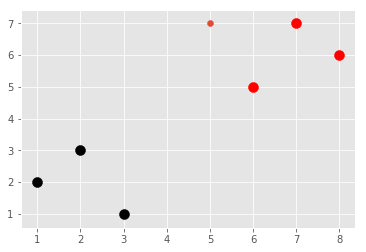

In [20]:
import numpy as np
import pandas as pd
import random
from math import sqrt
from sklearn import preprocessing, cross_validation, neighbors
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('ggplot')

dataset = {'k':[[1,2], [2,3], [3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1])
plt.show()

In [11]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean_distance1 = sqrt((features[0]-predict[0])**2 - (features[1]-predict[1])**2)
            #euclidean_distance2 = np.sqrt(np.sum((np.array(features)-np.aray(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

r


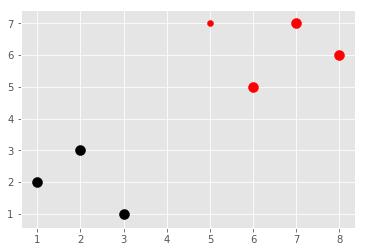

In [3]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color = result)
plt.show()

In [24]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean_distance1 = sqrt((features[0]-predict[0])**2 - (features[1]-predict[1])**2)
            #euclidean_distance2 = np.sqrt(np.sum((np.array(features)-np.aray(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    
    
    return vote_result, confidence

accuracy = []
accuracy2 = []


df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

for i in range(25):
    X = np.array(df.drop(['class'],1))
    y = np.array(df['class'])

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)

    accuracyclf = clf.score(X_test, y_test)

    accuracy2.append(accuracyclf)
    
    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence= k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct +=1
            #else:
                #print(confidence)
            total +=1
    #print('Accuracy:', correct/total)
    accuracy.append(correct/total)
    
print('SciKit:',sum(accuracy2)/len(accuracy2))
print('Homebrew:',sum(accuracy)/len(accuracy))

SciKit: 0.9711428571428573
Homebrew: 0.9640287769784169
